PCA for the Palmer Archipelago penguin dataset

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns

In [43]:
# download the data
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O /tmp/penguins.csv

In [44]:
# read data as a csv file
df = pd.read_csv("/tmp/penguins.csv")

In [45]:
# display the first 5 rows of the dataframe
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [46]:
df.info()
# verify if there are any missing values & check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [47]:
# no missing values for: species, island, year
# missing values: bill length, bill depth, flipper length, body mass, sex

# labels: species (first column)
# in this case, year and sex can be omitted, as they provide no information for
# the problem of species recognition

# delete the rows which contain empty values (cannot perform PCA with them)
df = df.dropna()

# features:
X = df.drop(['species', 'sex', 'year'], axis=1)
print('Features: \n', X.head())

# labels (penguin species):
y = df['species']
print('\nLabels:\n', y.head())

Features: 
       island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0  Torgersen            39.1           18.7              181.0       3750.0
1  Torgersen            39.5           17.4              186.0       3800.0
2  Torgersen            40.3           18.0              195.0       3250.0
4  Torgersen            36.7           19.3              193.0       3450.0
5  Torgersen            39.3           20.6              190.0       3650.0

Labels:
 0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object


In [49]:
# print all the island names
print(np.unique(df["island"]))

['Biscoe' 'Dream' 'Torgersen']


In [51]:
# transform string values to integer (island names)
# Biscoe = 0, Dream = 1, Torgersen = 2
en = LabelEncoder()
X["island"] = en.fit_transform(X["island"])
print(X)

     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0         2            39.1           18.7              181.0       3750.0
1         2            39.5           17.4              186.0       3800.0
2         2            40.3           18.0              195.0       3250.0
4         2            36.7           19.3              193.0       3450.0
5         2            39.3           20.6              190.0       3650.0
..      ...             ...            ...                ...          ...
339       1            55.8           19.8              207.0       4000.0
340       1            43.5           18.1              202.0       3400.0
341       1            49.6           18.2              193.0       3775.0
342       1            50.8           19.0              210.0       4100.0
343       1            50.2           18.7              198.0       3775.0

[333 rows x 5 columns]


Explained variance: [9.99892689e-01 7.82368979e-05 2.49127880e-05 3.72580342e-06
 4.35953772e-07]


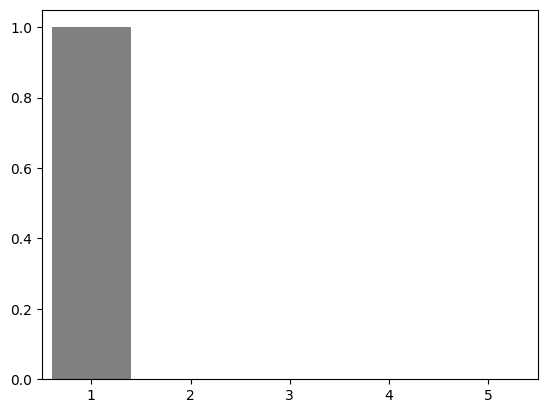

In [53]:
# perform PCA in order to determine what percent of variance is explained
# by each feature

pca = PCA()
PC = pca.fit_transform(X)
print('Explained variance:', pca.explained_variance_ratio_)
sns.barplot(x=np.arange(1, 6), y=pca.explained_variance_ratio_, color='grey')
plt.show()

# without the standardisation, only one feature explains almost the entire variance!!

In [54]:
# second version, with standardisation

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X) # scales the data
pca = PCA()
PC = pca.fit_transform(X)

Explained variance: [0.64164976 0.17547515 0.08808906 0.07370596 0.02108007]


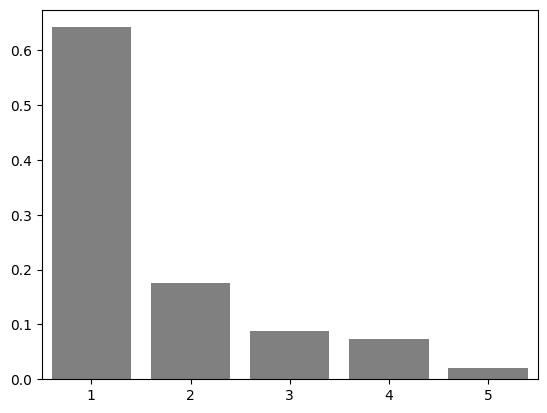

In [56]:
# barplot of explained variance:
print('Explained variance:', pca.explained_variance_ratio_)
sns.barplot(x=np.arange(1, 6), y=pca.explained_variance_ratio_, color='grey')
plt.show()

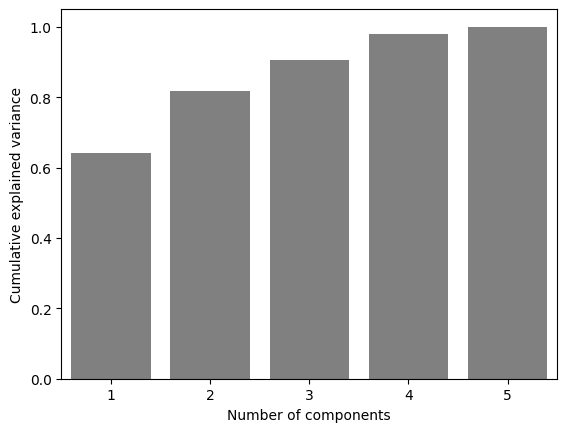

0.90521396897392
0.9789199277302334


In [59]:
# barplot of cumulative explained variance
# for 4 components, the value is very close to 1

cumulative=np.cumsum(pca.explained_variance_ratio_)
sns.barplot(x=np.arange(1, 6), y=np.cumsum(pca.explained_variance_ratio_), color='grey')
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of components')
plt.show()

# check the exact values for 3 and 4 components, respectively
print(cumulative[2])
print(cumulative[3])

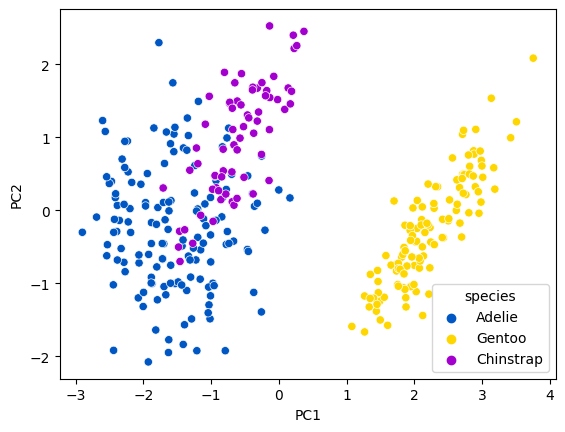

In [66]:
# based on the barplots above, we should retain the first 4 components as
# the 5th one explains less than 5% of the variance

# projection of data on a plane defined by the first two principal components
# PC1/PC2

sns.scatterplot(x=PC[:, 0], y=PC[:, 1], palette='prism', hue=y)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

# Gentoo penguins can be easily separated from the rest - however, the remaining
# two species (Adelie and Chinstrap) are mixed together and there is no
# definite border between them

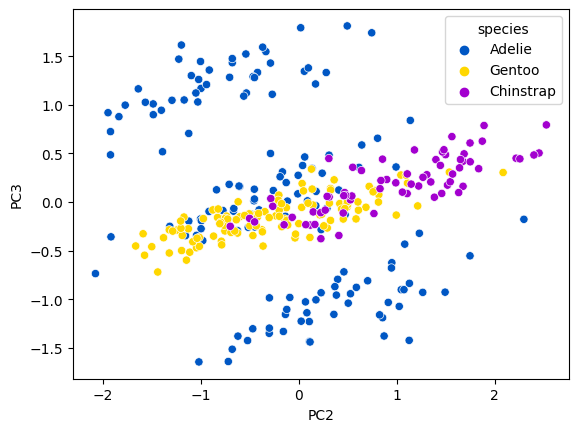

In [67]:
sns.scatterplot(x=PC[:, 1], y=PC[:, 2], palette='prism', hue=y)
plt.ylabel('PC3')
plt.xlabel('PC2')
plt.show()

# here, we can see that the projection on the PC2/PC3 plane doesn't allow for
# any separation, especially in the "middle" - all species are mixed together

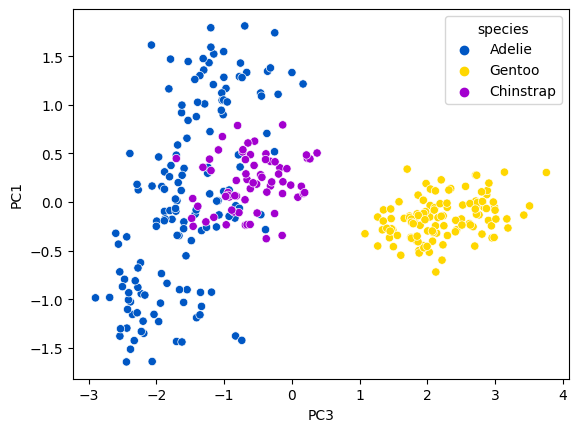

In [68]:
sns.scatterplot(x=PC[:, 0], y=PC[:, 2], palette='prism', hue=y)
plt.ylabel('PC1')
plt.xlabel('PC3')
plt.show()

# the PC1/PC3 projection allows for separation of the Gentoo penguins (again)
# the remaining two species could be separated too, but not precisely enough

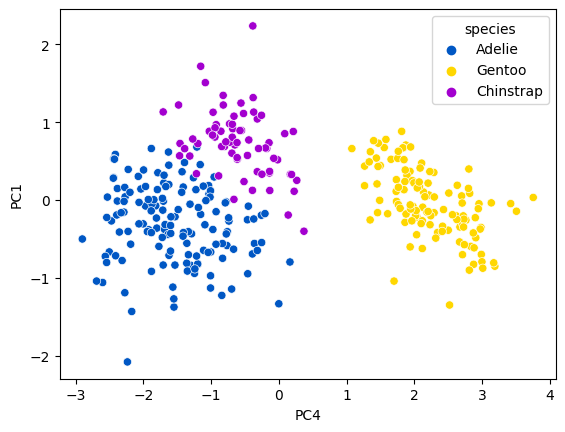

In [69]:
sns.scatterplot(x=PC[:, 0], y=PC[:, 3], palette='prism', hue=y)
plt.ylabel('PC1')
plt.xlabel('PC4')
plt.show()

# projection on the PC1/PC4 plane allows for the best separation of all species
# there are three distinct clusters, although Adelie and Chinstrap penguins are
# still very close

In [74]:
df_pc = pd.DataFrame(pca.components_, columns = df.columns[1:6])
df_pc

# transformed dataframe with the principal axes in feature space

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.417394,0.391331,-0.390732,0.520184,0.499379
1,0.425948,0.628509,0.606668,0.151281,0.180590
2,-0.798627,0.117841,0.526827,-0.252023,-0.085127
3,-0.032343,0.646056,-0.407855,-0.246967,-0.595170
4,0.074160,0.143390,-0.188125,-0.762899,0.597105


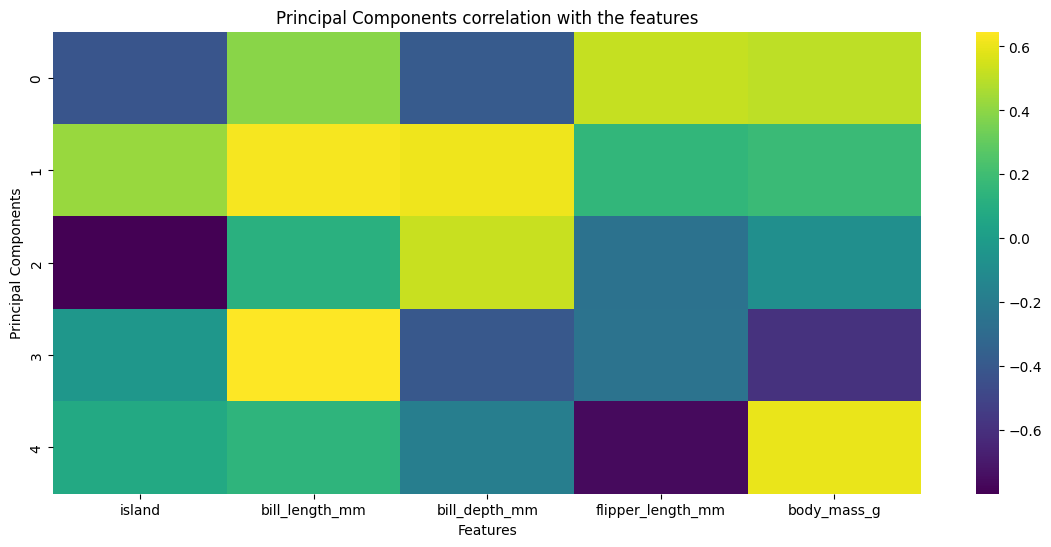

In [77]:
# heatmap showing correlation of each principal component with the
# original features

plt.figure(figsize=(14, 6))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

# for PC1 (0), bill depth and island correlate the least with the component
# for PC2 (1), bill features (length and depth) have the highest correlation
# for PC3 (2), island has a strong negative correlation with the component
# for PC4 (3), bill length has the highest correlation
# for PC5 (4), body mass has a very strong positive, and flipper length a very
# strong negative correlation